<a href="https://colab.research.google.com/github/LudovicaCi/SentimentAnalysis/blob/main/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Import


In [13]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/clean_full.csv')

<ipython-input-13-b897df89fa88>:4: DtypeWarning: Columns (0,2,9,13,14,15,16,18,21,22,23,24,25,29,30,31,32,33) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/clean_full.csv')


In [34]:
import pandas as pd


reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_0-250.csv')

<ipython-input-34-6219bb08f581>:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_0-250.csv')


In [35]:
print(reviews.shape[0])

602130


In [36]:
print(reviews.columns)

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')


# Data cleaning




*   remove empty reviews, rating and date values
*   remove duplicate review contents



In [37]:
reviews_cleaned = reviews.dropna(subset=['review_text', 'rating', 'submission_time'])

In [38]:
righe_con_valori_vuoti = reviews_cleaned['submission_time'].isnull()

# Visualizza le righe con valori vuoti nell'attributo specificato
righe_con_valori_vuoti_df = reviews_cleaned[righe_con_valori_vuoti]
print(righe_con_valori_vuoti_df)

Empty DataFrame
Columns: [Unnamed: 0, author_id, rating, is_recommended, helpfulness, total_feedback_count, total_neg_feedback_count, total_pos_feedback_count, submission_time, review_text, review_title, skin_tone, eye_color, skin_type, hair_color, product_id, product_name, brand_name, price_usd]
Index: []


In [39]:
print(reviews_cleaned.shape[0])

601131


In [40]:
# Verifica la presenza di recensioni duplicate basate sul contenuto della colonna "review_content"
duplicati = reviews_cleaned.duplicated(subset=['review_text'], keep=False)

# Visualizza le righe duplicate (True) nel DataFrame originale
print(reviews_cleaned[duplicati])

        Unnamed: 0    author_id  rating  is_recommended  helpfulness  \
877            877  22934451719       5             1.0     1.000000   
878            878  22934451719       5             1.0     0.666667   
1586          1586   6293496826       5             1.0     0.285714   
2136          2136  33914299569       5             1.0     0.058823   
2137          2137  33914299569       5             1.0     0.000000   
...            ...          ...     ...             ...          ...   
600782      600782  11195120927       4             1.0          NaN   
601156      601156  37938390287       4             1.0          NaN   
601176      601176   5381115316       3             1.0          NaN   
601721      601721   1589642746       3             0.0          NaN   
601726      601726   2796731296       5             1.0          NaN   

        total_feedback_count  total_neg_feedback_count  \
877                        2                         0   
878                

In [42]:
reviews_cleaned = reviews_cleaned.drop_duplicates(subset=['review_text'])

In [43]:
print(reviews_cleaned.columns)

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')


In [31]:
import pandas as pd
from dateutil import parser

# Verifica i formati delle date nella colonna "date"
date_formats = reviews_cleaned['submission_date'].apply(lambda x: parser.parse(str(x), fuzzy=True).strftime('%Y-%m-%d %H:%M:%S') if pd.notnull(x) else None)

# Visualizza tutti i formati unici delle date
unique_date_formats = set(date_formats.dropna())
print("Unique Date Formats:", unique_date_formats)

Unique Date Formats: {'2011-07-10 00:00:00', '2013-11-21 00:00:00', '2016-08-11 00:00:00', '2012-08-20 00:00:00', '2015-08-25 00:00:00', '2018-10-06 00:00:00', '2009-08-21 00:00:00', '2011-05-29 00:00:00', '2016-08-03 00:00:00', '2011-05-28 00:00:00', '2018-10-19 00:00:00', '2017-06-23 00:00:00', '2018-01-21 00:00:00', '2016-07-15 00:00:00', '2012-08-17 00:00:00', '2013-05-21 00:00:00', '2019-01-01 00:00:00', '2017-04-05 00:00:00', '2014-10-04 00:00:00', '2009-02-01 00:00:00', '2017-11-13 00:00:00', '2018-09-01 00:00:00', '2018-02-02 00:00:00', '2019-03-15 00:00:00', '2018-05-31 00:00:00', '2016-02-17 00:00:00', '2012-10-22 00:00:00', '2009-03-10 00:00:00', '2018-04-19 00:00:00', '2016-06-04 00:00:00', '2013-04-26 00:00:00', '2018-08-19 00:00:00', '2019-06-03 00:00:00', '2014-05-27 00:00:00', '2014-12-02 00:00:00', '2017-05-24 00:00:00', '2012-10-31 00:00:00', '2012-03-11 00:00:00', '2012-04-13 00:00:00', '2014-12-10 00:00:00', '2010-02-04 00:00:00', '2017-11-26 00:00:00', '2010-08-30 

In [44]:
reviews_cleaned.head()

,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


# Data reduction


In [45]:
# List of columns to keep
columns_to_keep = ['review_text', 'rating', 'submission_time']

# Remove all columns except the specified ones
reviews = reviews_cleaned[columns_to_keep]

In [46]:
print(reviews.columns)

Index(['review_text', 'rating', 'submission_time'], dtype='object')


In [47]:
print(reviews.shape[0])

508467


<ipython-input-50-f654175924bf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])


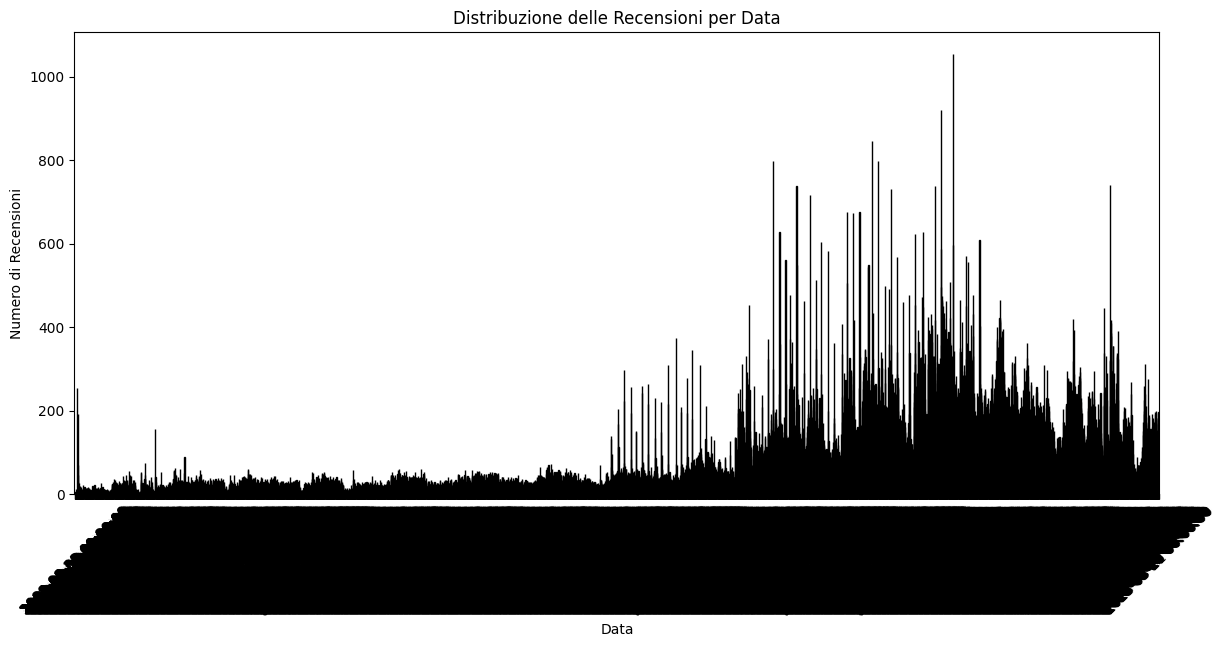

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# Converti la colonna delle date in formato datetime
reviews['submission_time'] = pd.to_datetime(reviews['submission_time'])

# Crea un istogramma per la distribuzione delle recensioni per ogni data
plt.figure(figsize=(14, 6))
counts = reviews['submission_time'].value_counts().sort_index()
counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuzione delle Recensioni per Data')
plt.xlabel('Data')
plt.ylabel('Numero di Recensioni')
plt.xticks(rotation=45)

# Calcola la trasformata di Fourier
N = len(counts)
frequencies = np.fft.fftfreq(N)
fft_values = fft(counts)

# Individua i picchi nella trasformata di Fourier
peaks = np.where(np.abs(fft_values) > 0.1 * np.max(np.abs(fft_values)))

# Mostra i picchi sul grafico
for peak in peaks[0]:
    plt.annotate(f'Peak {peak}', xy=(frequencies[peak], np.abs(fft_values[peak])),
                 xytext=(frequencies[peak], np.abs(fft_values[peak]) + 100),
                 arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()